In [ ]:
'''
Stacking
    - A pool of base models are first trained using training data and asked to give their prediction; a different meta model 
      is then trained to use outputs from base models to give the final prediction.

## Stacking

In [ ]:
'''

Step 1: 
    - You have Train and Test data
    - Divide Train data into 4 Folds

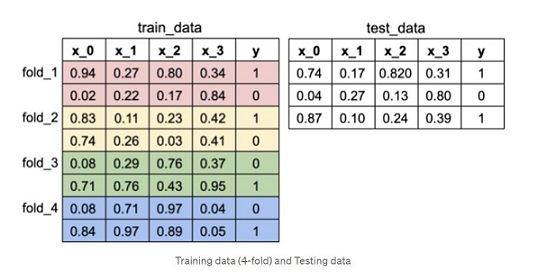

In [ ]:
'''

Step 2:
    - In the 4 part of train_data, 1st the 1st base model (assuming its a decision tree) is fitted on 3 parts and predictions 
      are made for the 4th part
    - This is done for each part of the training data. At the end, all instance from training data will have a prediction. 

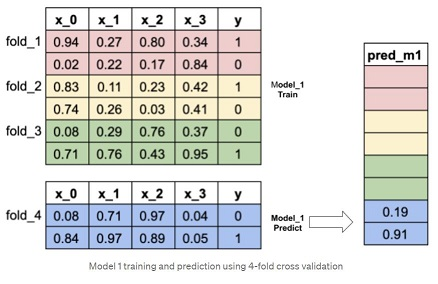

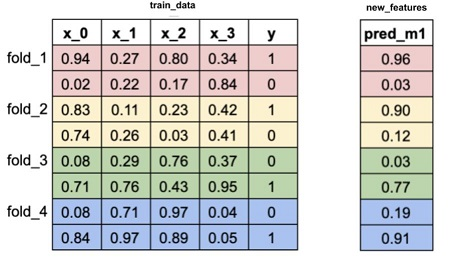

In [ ]:
'''

Step 3:
    - Model 1 (decision tree) is then fitted on the whole training data.no folding is needed this time. The trained model 
      will be used to prediction Test data. So test_data will also have pred_m1.

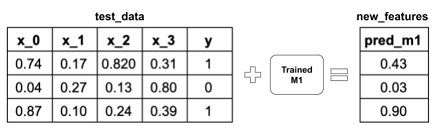

In [ ]:
'''

Step 4:
    - Step 2 to 3 are repeated for the 2nd model (e.g KNN) and the 3rd model (e.g. SVM). 
      These will give both train_data and test_data two more predictions, pred_m2 and pred_m3

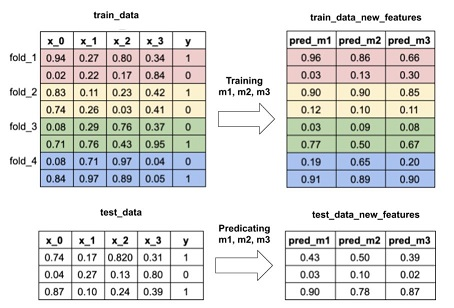

In [ ]:
'''

Step 5:
    - Now, to train the meta model (assume it’s a logistic regression), we use only the newly added features from the base
      models, which are [pred_m1, pred_m2, pred_m3]. Fit this meta model on train_data.

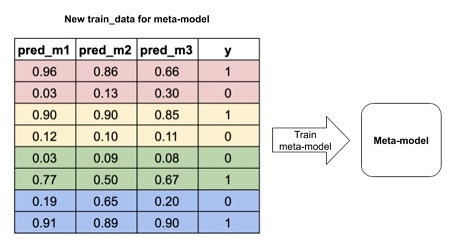

In [ ]:
'''
Step 6: The final prediction for test_data is given by the trained meta model.

In [ ]:
def Stacking(model,train,y,test,n_fold):
  folds=StratifiedKFold(n_splits=n_fold,random_state=1)
  test_pred=np.empty((test.shape[0],1),float)
  train_pred=np.empty((0,1),float)
  
  for train_indices,val_indices in folds.split(train,y.values):
    x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
    y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
    model.fit(X=x_train,y=y_train)
    train_pred=np.append(train_pred,model.predict(x_val))
    test_pred=np.append(test_pred,model.predict(test))
    
  return test_pred.reshape(-1,1),train_pred

# initialise the base models
model_1 = tree.DecisionTreeClassifier(random_state=1)
model_2 = KNeighborsClassifier()

# train base models and create new featurs
test_pred_1 ,train_pred_1=Stacking(model=model_1,n_fold=10, train=x_train,test=x_test,y=y_train)
test_pred_2 ,train_pred_2=Stacking(model=model_2,n_fold=10,train=x_train,test=x_test,y=y_train)

# convert into dataframe for later use
train_pred_1=pd.DataFrame(train_pred_1)
test_pred_1=pd.DataFrame(test_pred_1)
train_pred_2=pd.DataFrame(train_pred_2)
test_pred_2=pd.DataFrame(test_pred_2)

df = pd.concat([train_pred_1, train_pred_2], axis=1)
df_test = pd.concat([test_pred_1, test_pred_2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

## Blending

In [ ]:
'''
Blending is very similar to Stacking. It also uses base models to provide base predictions as new features and a new meta 
model is trained on the new features and gives the final prediction.

The only difference is that training of meta-model is applied on a separate holdout set (e.g 10% of train_data)rather on 
full and folded training set.

In [ ]:
'''
Step 1: train_data is split into base_train_data and holdout_set.


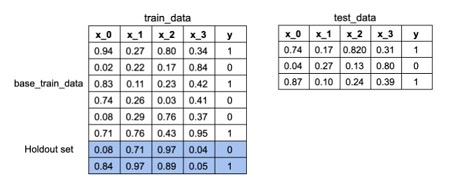

In [ ]:
'''
Step 2:  Base models are fitted on base_train_data, and predictions are made on holdout_set and test_data. 
         These will create new prediction features.

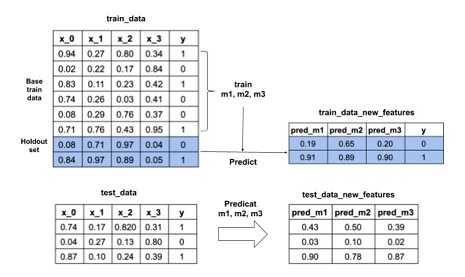

In [ ]:
'''
Step 3: 
    - A new meta-model is then fit on holdout_set with new prediction features. 
      Both original and meta features from holdout_set will be used.

In [ ]:
'''
Step 4: 
    - The trained meta-model is used to make final predictions on the test data using both original and new meta features.

In [ ]:
# Sample Code

In [ ]:
model_1 = tree.DecisionTreeClassifier()
model_1.fit(x_train, y_train)
holdout_pred_1=model_1.predict(x_val)
test_pred_1=model_1.predict(x_test)
holdout_pred_1=pd.DataFrame(holdout_pred_1)
test_pred1=pd.DataFrame(test_pred1)

model_2 = KNeighborsClassifier()
model_2.fit(x_train,y_train)
holdout_pred_2=model_2.predict(x_val)
test_pred_2=model_2.predict(x_test)
holdout_pred_2=pd.DataFrame(holdout_pred_2)
test_pred_2=pd.DataFrame(test_pred_2)

df_holdout=pd.concat([x_val, holdout_pred_1,holdout_pred_2],axis=1)
df_test=pd.concat([x_test, test_pred_1,test_pred_2],axis=1)

model = LogisticRegression()
model.fit(df_holdout,y_holdout)
model.score(df_test,y_test)